In [ ]:
# Importin Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,ID,Datetime,City_ID,Particulate_matter,SO2_concentration,O3_concentration,CO_concentration,NO2_concentration,Presure,Dew_point,Precipitation,Anonymous_X1,Wind_speed,Moisture_percent,Temperature
0,0,01-01-2017 14:00,0,14.0,40.12,85,600.14,38.55,1024.5,-21.4,0.0,1.15,5.7,62.84,-0.323
1,1,01-01-2017 15:00,0,12.0,65.59,84,2082.38,96.09,1025.1,-22.1,0.0,2.24,3.9,79.45,-0.570
2,2,01-01-2017 16:00,0,6.0,58.87,83,1475.88,111.09,1025.3,-24.6,0.0,45.70,5.3,83.44,-1.008
3,3,01-01-2017 17:00,0,5.0,84.67,84,2448.53,67.59,1026.2,-25.5,0.0,15.90,4.9,81.27,-1.234
4,4,01-01-2017 18:00,0,5.0,83.66,77,2224.61,95.86,1027.1,-24.5,0.0,31.30,3.2,81.93,-1.704


#EDA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  56000 non-null  int64  
 1   Datetime            56000 non-null  object 
 2   City_ID             56000 non-null  int64  
 3   Particulate_matter  55340 non-null  float64
 4   SO2_concentration   56000 non-null  object 
 5   O3_concentration    55198 non-null  object 
 6   CO_concentration    56000 non-null  object 
 7   NO2_concentration   56000 non-null  float64
 8   Presure             56000 non-null  float64
 9   Dew_point           56000 non-null  float64
 10  Precipitation       56000 non-null  float64
 11  Anonymous_X1        55784 non-null  float64
 12  Wind_speed          56000 non-null  float64
 13  Moisture_percent    56000 non-null  float64
 14  Temperature         56000 non-null  float64
dtypes: float64(9), int64(2), object(4)
memory usage: 6.4+

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,56000.0,31521.500000,19296.643919,0.000,13999.75000,31521.500,49043.2500,63043.000
City_ID,56000.0,0.500000,0.500004,0.000,0.00000,0.500,1.0000,1.000
Particulate_matter,55340.0,110.548066,95.174784,2.000,39.00000,88.000,152.0000,995.000
NO2_concentration,56000.0,143.438337,76.744127,2.000,80.36750,153.380,210.7800,269.990
Presure,56000.0,1012.431143,10.121543,987.100,1004.27500,1012.100,1020.6000,1042.000
Dew_point,56000.0,1.940343,13.731029,-35.300,-9.20000,2.100,14.5000,28.800
Precipitation,56000.0,0.055943,0.687729,0.000,0.00000,0.000,0.0000,36.600
Anonymous_X1,55784.0,49.601420,24.989324,0.000,31.02000,49.520,67.1900,99.990
Wind_speed,56000.0,1.899418,1.324907,0.000,1.00000,1.500,2.5000,10.500
Moisture_percent,56000.0,45.653169,17.302524,15.000,32.94000,44.100,59.3325,85.000


In [ ]:
df = df[(df["Datetime"] != "-80") & (df["Datetime"] != "-150")]

In [ ]:
df["Datetime"]=pd.to_datetime(df["Datetime"], format="%d-%m-%Y %H:%M")

In [ ]:
df["SO2_concentration"] = pd.to_numeric(df["SO2_concentration"], errors='coerce')
df["O3_concentration"] = pd.to_numeric(df["O3_concentration"], errors='coerce')
df["CO_concentration"] = pd.to_numeric(df["CO_concentration"], errors='coerce')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54493 entries, 0 to 55999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  54493 non-null  int64         
 1   Datetime            54493 non-null  datetime64[ns]
 2   City_ID             54493 non-null  int64         
 3   Particulate_matter  54493 non-null  float64       
 4   SO2_concentration   54493 non-null  float64       
 5   O3_concentration    54493 non-null  float64       
 6   CO_concentration    54493 non-null  float64       
 7   NO2_concentration   54493 non-null  float64       
 8   Presure             54493 non-null  float64       
 9   Dew_point           54493 non-null  float64       
 10  Precipitation       54493 non-null  float64       
 11  Anonymous_X1        54493 non-null  float64       
 12  Wind_speed          54493 non-null  float64       
 13  Moisture_percent    54493 non-null  float64       


In [ ]:
df.columns

Index(['ID', 'Datetime', 'City_ID', 'Particulate_matter', 'SO2_concentration',
       'O3_concentration', 'CO_concentration', 'NO2_concentration', 'Presure',
       'Dew_point', 'Precipitation', 'Anonymous_X1', 'Wind_speed',
       'Moisture_percent', 'Temperature'],
      dtype='object')

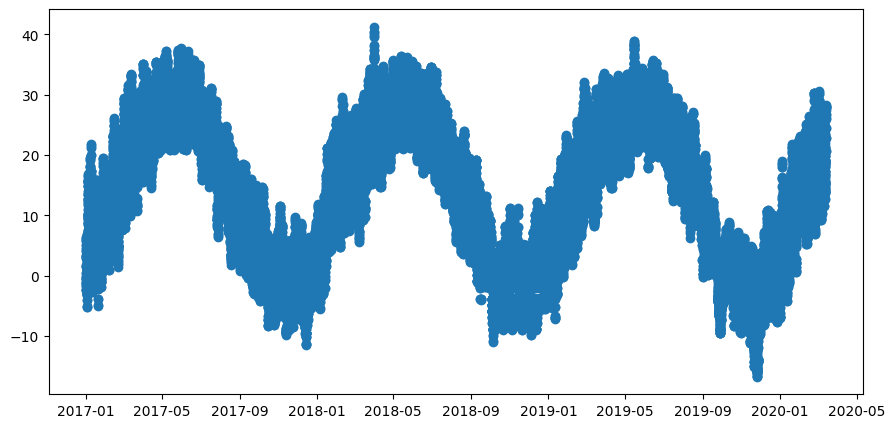

In [ ]:
fig,ax  = plt.subplots(figsize= (10.5,5))

plt.scatter(data = df,x="Datetime", y="Temperature");

<Axes: >

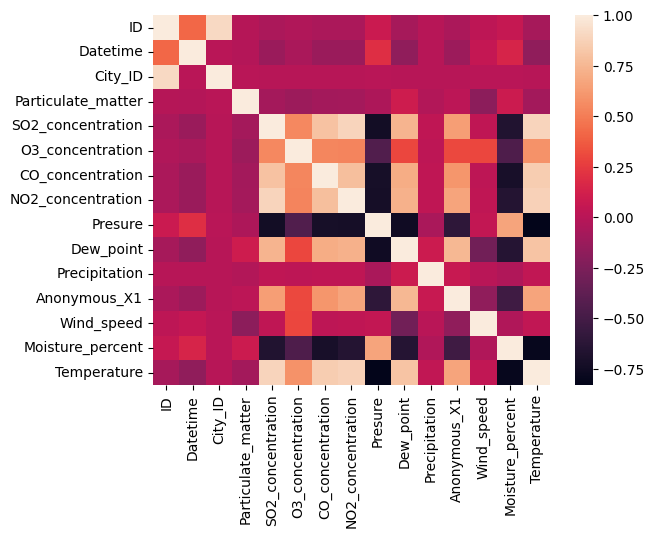

In [ ]:
corr = df.corr()
sns.heatmap(corr)

In [ ]:
df= df.query("Temperature>-10 & Temperature<36")
df.shape

(54259, 15)

#TRAIN THE MODEL

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

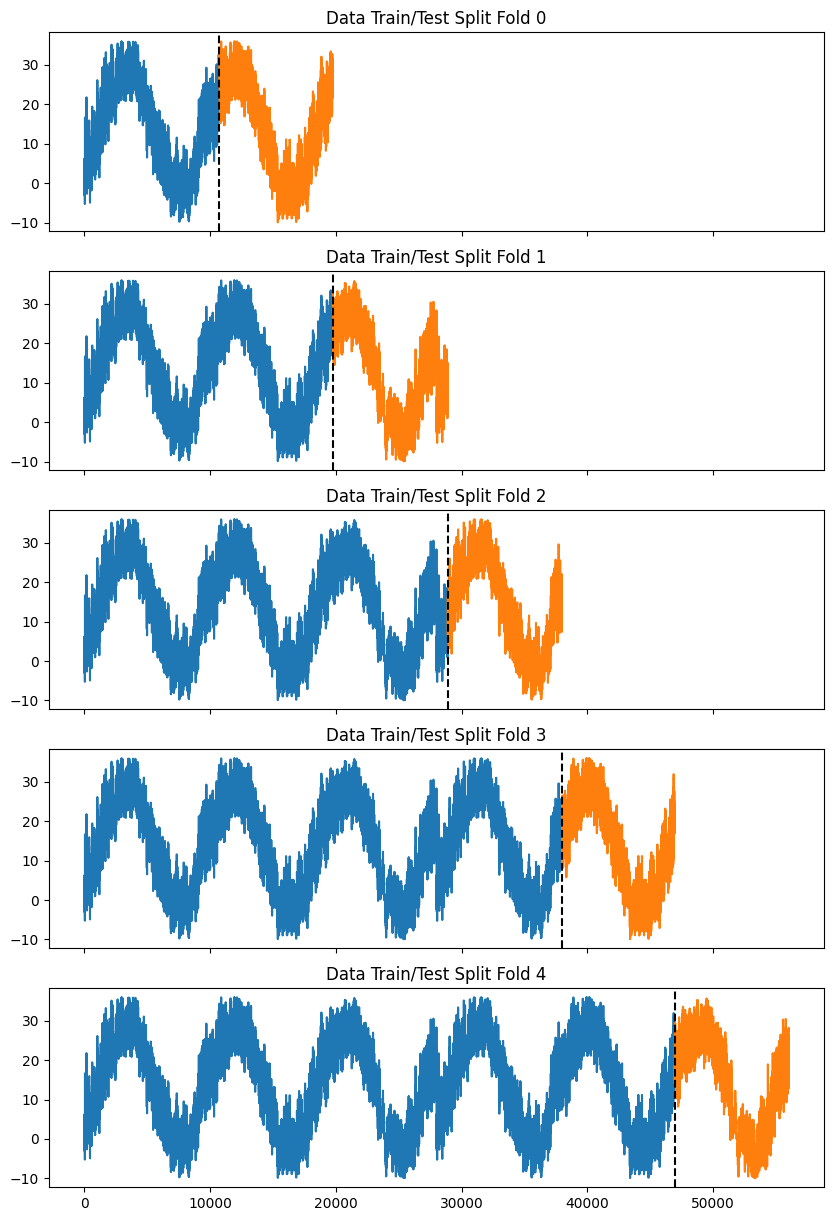

In [ ]:
tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1,gap=24)
df = df.sort_index()

fig, ax = plt.subplots(5,1, figsize=(10,15),
                            sharex=True)
fold=0

for train_idx, val_idx in tss.split(df):
  train = df.iloc[train_idx]
  test = df.iloc[val_idx]
  train["Temperature"].plot(ax=ax[fold],label="Training Set",title=f"Data Train/Test Split Fold {fold}",)
  test["Temperature"].plot(ax=ax[fold],label="Test Set")
  ax[fold].axvline(test.index.min(0),color="black",ls="--")
  fold += 1
plt.show()

# Lag Features

In [ ]:
df["Datetime"]= df.set_index(df["Datetime"],drop=True,inplace=True)

In [ ]:
df.head()

,ID,Datetime,City_ID,Particulate_matter,SO2_concentration,O3_concentration,CO_concentration,NO2_concentration,Presure,Dew_point,Precipitation,Anonymous_X1,Wind_speed,Moisture_percent,Temperature
Datetime,,,,,,,,,,,,,,,
2017-01-01 14:00:00,0,None,0,14.0,40.12,85.0,600.14,38.55,1024.5,-21.4,0.0,1.15,5.7,62.84,-0.323
2017-01-01 15:00:00,1,None,0,12.0,65.59,84.0,2082.38,96.09,1025.1,-22.1,0.0,2.24,3.9,79.45,-0.570
2017-01-01 16:00:00,2,None,0,6.0,58.87,83.0,1475.88,111.09,1025.3,-24.6,0.0,45.70,5.3,83.44,-1.008
2017-01-01 17:00:00,3,None,0,5.0,84.67,84.0,2448.53,67.59,1026.2,-25.5,0.0,15.90,4.9,81.27,-1.234
2017-01-01 18:00:00,4,None,0,5.0,83.66,77.0,2224.61,95.86,1027.1,-24.5,0.0,31.30,3.2,81.93,-1.704


In [ ]:
df.drop(columns = ["Datetime"],inplace=True)

In [ ]:
def create_features(df):
  df["hour"] = df.index.hour
  df["daysofweek"] = df.index.dayofweek
  df["quater"] = df.index.quarter
  df["month"] = df.index.month
  df["year"] = df.index.year
  df["dayofyear"] = df.index.dayofyear
  df["dayofmonth"] = df.index.day
  df["weekofyear"] = df.index.isocalendar().week
  return df

In [ ]:
def create_lag_features(df):
  target_map = df["Temperature"].to_dict()
  df["lag1"] = (df.index - pd.Timedelta('364 days')).map(target_map)
  df["lag2"] = (df.index - pd.Timedelta('728 days')).map(target_map)
  df["lag3"] = (df.index - pd.Timedelta('1092 days')).map(target_map)
  return df

In [ ]:
df = create_lag_features(df)
df = create_features(df)
df.tail()

,ID,City_ID,Particulate_matter,SO2_concentration,O3_concentration,CO_concentration,NO2_concentration,Presure,Dew_point,Precipitation,...,lag2,lag3,hour,daysofweek,quater,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-03-13 03:00:00,63039,1,103.0,232.74,128.0,6075.55,240.01,1004.3,4.4,0.0,...,29.747,28.931,3,4,1,3,2020,73,13,11
2020-03-13 04:00:00,63040,1,75.0,241.44,154.0,6080.48,254.33,1003.3,4.2,0.0,...,29.687,29.749,4,4,1,3,2020,73,13,11
2020-03-13 05:00:00,63041,1,63.0,220.01,172.0,5974.36,233.80,1002.6,5.1,0.0,...,30.183,30.306,5,4,1,3,2020,73,13,11
2020-03-13 06:00:00,63042,1,60.0,206.98,170.0,5741.71,263.99,1002.1,5.9,0.0,...,29.518,29.836,6,4,1,3,2020,73,13,11
2020-03-13 07:00:00,63043,1,64.0,210.63,165.0,4780.37,251.07,1001.8,6.2,0.0,...,28.607,29.650,7,4,1,3,2020,73,13,11


In [ ]:
df.columns

Index(['ID', 'City_ID', 'Particulate_matter', 'SO2_concentration',
       'O3_concentration', 'CO_concentration', 'NO2_concentration', 'Presure',
       'Dew_point', 'Precipitation', 'Anonymous_X1', 'Wind_speed',
       'Moisture_percent', 'Temperature', 'lag1', 'lag2', 'lag3', 'hour',
       'daysofweek', 'quater', 'month', 'year', 'dayofyear', 'dayofmonth',
       'weekofyear'],
      dtype='object')

In [ ]:
tss = TimeSeriesSplit(n_splits=4, test_size=24*365*1,gap=24)
df = df.sort_index()
fold=0
preds = []
scores = []

for train_idx,val_idx in tss.split(df):
  train = df.iloc[train_idx]
  test = df.iloc[val_idx]
  Features = ['Particulate_matter', 'SO2_concentration',
              'O3_concentration', 'CO_concentration', 'NO2_concentration', 'Presure',
              'Dew_point', 'Precipitation', 'Anonymous_X1', 'Wind_speed',
              'Moisture_percent', 'lag1', 'lag2', 'lag3', 'hour',
              'daysofweek', 'quater', 'month', 'year', 'dayofyear', 'dayofmonth',
              'weekofyear']
  Target = "Temperature"
  X_train = train[Features]
  y_train = train[Target]
  X_test = test[Features]
  y_test = test[Target]

  reg = xgb.XGBRegressor(base_score = 0.5,booster = 'gbtree', early_stopping_rounds=50 ,n_estimators=700,max_depth =7,objective= 'reg:linear',learning_rate = 0.01)
  reg.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],verbose=100)
  y_pred = reg.predict(X_test)
  preds.append(y_pred)
  score = max(0,100-mean_squared_error(y_test,y_pred))
  scores.append(score)

In [ ]:
scores

[97.84858248636328, 95.79065703523749, 98.06622430801576, 95.28748691780937]

In [ ]:
Features = ['Particulate_matter', 'SO2_concentration',
              'O3_concentration', 'CO_concentration', 'NO2_concentration', 'Presure',
              'Dew_point', 'Precipitation', 'Anonymous_X1', 'Wind_speed',
              'Moisture_percent', 'lag1', 'lag2', 'lag3', 'hour',
              'daysofweek', 'quater', 'month', 'year', 'dayofyear', 'dayofmonth',
              'weekofyear']
Target = "Temperature"
X_train = df[Features]
y_test = df[Target]

reg = xgb.XGBRegressor(base_score = 0.5,booster = 'gbtree', n_jobs = 1,early_stopping_rounds=50 ,n_estimators=800,max_depth = 6,objective= 'reg:squarederror',learning_rate = 0.01)
reg.fit(X_train,y_test,eval_set=[(X_train,y_test) ],verbose=100)

[0]	validation_0-rmse:17.09088
[100]	validation_0-rmse:6.53990
[200]	validation_0-rmse:2.91331
[300]	validation_0-rmse:1.84073
[400]	validation_0-rmse:1.56397
[500]	validation_0-rmse:1.46945
[600]	validation_0-rmse:1.41572
[700]	validation_0-rmse:1.37460
[799]	validation_0-rmse:1.34382


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=800, n_jobs=1,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Define the model and parameters
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1, learning_rate=0.01)

# Define parameter grid for RandomizedSearchCV
param_grid = {
    'max_depth': [5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'n_estimators': [1000, 1200, 1500],
}

# Search for best parameters
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', verbose=2
)
random_search.fit(X_train, y_test)

# Check best parameters and train final model
best_xgb_model = random_search.best_estimator_

# Predict and evaluate
y_train_pred = best_xgb_model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f"Training RMSE: {train_rmse}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.7, max_depth=9, min_child_weight=3, n_estimators=1000, subsample=0.7; total time=  30.0s
[CV] END colsample_bytree=0.7, max_depth=9, min_child_weight=3, n_estimators=1000, subsample=0.7; total time=  30.8s
[CV] END colsample_bytree=0.7, max_depth=9, min_child_weight=3, n_estimators=1000, subsample=0.7; total time=  34.7s
[CV] END colsample_bytree=0.7, max_depth=9, min_child_weight=3, n_estimators=1000, subsample=0.7; total time=  29.8s
[CV] END colsample_bytree=0.7, max_depth=9, min_child_weight=3, n_estimators=1000, subsample=0.7; total time=  28.4s
[CV] END colsample_bytree=0.7, max_depth=7, min_child_weight=1, n_estimators=1200, subsample=0.7; total time=  19.3s
[CV] END colsample_bytree=0.7, max_depth=7, min_child_weight=1, n_estimators=1200, subsample=0.7; total time=  17.0s
[CV] END colsample_bytree=0.7, max_depth=7, min_child_weight=1, n_estimators=1200, subsample=0.7; total time=  17.6s
[CV

In [ ]:
df_test = pd.read_csv("test.csv")
df_test.tail()

,ID,Datetime,City_ID,Particulate_matter,SO2_concentration,O3_concentration,CO_concentration,NO2_concentration,Presure,Dew_point,Precipitation,Anonymous_X1,Wind_speed,Moisture_percent
14083,70083,01/01/21 09:00,1,51.0,110.82,73,2103.88,113.72,1013.5,-16.2,0.0,4.16,2.4,54.74
14084,70084,01/01/21 10:00,1,45.0,87.31,54,4427.54,163.78,1013.6,-15.1,0.0,10.96,0.9,59.54
14085,70085,01/01/21 11:00,1,58.0,139.13,28,3060.49,155.70,1014.2,-13.3,0.0,18.58,1.1,36.62
14086,70086,01/01/21 12:00,1,53.0,104.13,15,2367.7,118.81,1014.4,-12.9,0.0,29.39,1.2,54.63
14087,70087,01/01/21 13:00,1,71.0,84.71,4,1495.21,45.98,1014.1,-15.9,0.0,2.00,1.3,55.01


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14088 entries, 0 to 14087
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  14088 non-null  int64  
 1   Datetime            14088 non-null  object 
 2   City_ID             14088 non-null  int64  
 3   Particulate_matter  13755 non-null  float64
 4   SO2_concentration   14088 non-null  object 
 5   O3_concentration    13722 non-null  object 
 6   CO_concentration    14088 non-null  object 
 7   NO2_concentration   14088 non-null  float64
 8   Presure             14088 non-null  float64
 9   Dew_point           14088 non-null  float64
 10  Precipitation       14088 non-null  float64
 11  Anonymous_X1        14024 non-null  float64
 12  Wind_speed          14088 non-null  float64
 13  Moisture_percent    14088 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 1.5+ MB


In [ ]:
def cleaning_data(df):
  if not isinstance(df, pd.DataFrame):
        raise TypeError("Input must be a pandas DataFrame")
  df["Datetime"] = pd.to_datetime(df["Datetime"], format="%d/%m/%y %H:%M", errors='coerce')
  df["SO2_concentration"] = pd.to_numeric(df["SO2_concentration"], errors='coerce')
  df["O3_concentration"] = pd.to_numeric(df["O3_concentration"], errors='coerce')
  df["CO_concentration"] = pd.to_numeric(df["CO_concentration"], errors='coerce')
  df.fillna(method="ffill",inplace=True)
  df.set_index(df["Datetime"],drop=True,inplace=True)
  df.drop(columns=["Datetime"],inplace=True)
  return df


In [ ]:
df_test = cleaning_data(df_test)
df_test = create_features(df_test)
df_test.head()

<ipython-input-21-cf338e9aa71b>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill",inplace=True)


,ID,City_ID,Particulate_matter,SO2_concentration,O3_concentration,CO_concentration,NO2_concentration,Presure,Dew_point,Precipitation,...,Wind_speed,Moisture_percent,hour,daysofweek,quater,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-03-13 08:00:00,28000,0,74.0,245.32,162.0,6417.29,250.96,1001.7,6.2,0.0,...,3.3,30.21,8,4,1,3,2020,73,13,11
2020-03-13 09:00:00,28001,0,62.0,215.12,154.0,5056.86,251.40,1002.0,6.5,0.0,...,2.7,28.33,9,4,1,3,2020,73,13,11
2020-03-13 10:00:00,28002,0,103.0,173.38,144.0,5083.63,180.74,1002.1,8.2,0.0,...,3.4,36.45,10,4,1,3,2020,73,13,11
2020-03-13 11:00:00,28003,0,125.0,148.45,140.0,6858.93,201.13,1002.5,9.6,0.0,...,2.8,35.26,11,4,1,3,2020,73,13,11
2020-03-13 12:00:00,28004,0,89.0,159.23,142.0,6435.99,221.34,1002.6,10.2,0.0,...,2.6,26.16,12,4,1,3,2020,73,13,11


In [ ]:
df_test["isfuture"] = True
df["isfuture"] = False
df_future = pd.concat([df,df_test])
df_future = create_lag_features(df_future)

In [ ]:
future = df_future.query("isfuture").copy()
future.head()

,ID,City_ID,Particulate_matter,SO2_concentration,O3_concentration,CO_concentration,NO2_concentration,Presure,Dew_point,Precipitation,...,lag3,hour,daysofweek,quater,month,year,dayofyear,dayofmonth,weekofyear,isfuture
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-03-13 08:00:00,28000,0,74.0,245.32,162.0,6417.29,250.96,1001.7,6.2,0.0,...,27.490,8,4,1,3,2020,73,13,11,True
2020-03-13 09:00:00,28001,0,62.0,215.12,154.0,5056.86,251.40,1002.0,6.5,0.0,...,25.739,9,4,1,3,2020,73,13,11,True
2020-03-13 10:00:00,28002,0,103.0,173.38,144.0,5083.63,180.74,1002.1,8.2,0.0,...,25.502,10,4,1,3,2020,73,13,11,True
2020-03-13 11:00:00,28003,0,125.0,148.45,140.0,6858.93,201.13,1002.5,9.6,0.0,...,23.491,11,4,1,3,2020,73,13,11,True
2020-03-13 12:00:00,28004,0,89.0,159.23,142.0,6435.99,221.34,1002.6,10.2,0.0,...,22.003,12,4,1,3,2020,73,13,11,True


In [ ]:
future.columns

Index(['ID', 'City_ID', 'Particulate_matter', 'SO2_concentration',
       'O3_concentration', 'CO_concentration', 'NO2_concentration', 'Presure',
       'Dew_point', 'Precipitation', 'Anonymous_X1', 'Wind_speed',
       'Moisture_percent', 'Temperature', 'lag1', 'lag2', 'lag3', 'hour',
       'daysofweek', 'quater', 'month', 'year', 'dayofyear', 'dayofmonth',
       'weekofyear', 'isfuture'],
      dtype='object')

In [ ]:
def creating_prediction(model, df):
    # Check that input is a DataFrame
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Input must be a pandas DataFrame")

    # Define the list of features required for prediction
    features = ['Particulate_matter', 'SO2_concentration',
              'O3_concentration', 'CO_concentration', 'NO2_concentration', 'Presure',
              'Dew_point', 'Precipitation', 'Anonymous_X1', 'Wind_speed',
              'Moisture_percent', 'lag1', 'lag2', 'lag3', 'hour',
              'daysofweek', 'quater', 'month', 'year', 'dayofyear', 'dayofmonth',
              'weekofyear']

    # Use the list of features correctly for model prediction
    y_test_predict = model.predict(df[features])

    # Create the submission DataFrame
    submission_dict = {
        "ID": df["ID"],
        "Temperature": y_test_predict
    }

    # Construct the DataFrame from the dictionary and set the 'ID' column as the index
    submission_file = pd.DataFrame(submission_dict)
    # Save the results to a CSV file
    submission_file.to_csv("sample_submission.csv")


In [ ]:
creating_prediction(reg,future)

In [ ]:
df_sub= pd.read_csv("sample_submission.csv")
df_sub

,Datetime,ID,Temperature
0,2020-03-13 08:00:00,28000,27.748430
1,2020-03-13 09:00:00,28001,27.316778
2,2020-03-13 10:00:00,28002,23.298906
3,2020-03-13 11:00:00,28003,22.909307
4,2020-03-13 12:00:00,28004,22.719160
...,...,...,...
14083,2021-01-01 09:00:00,70083,10.740471
14084,2021-01-01 10:00:00,70084,11.209666
14085,2021-01-01 11:00:00,70085,14.315773
14086,2021-01-01 12:00:00,70086,9.022154


In [ ]:
df_sub.index

RangeIndex(start=0, stop=14088, step=1)